For this project I use `BechleLUR_2006_allmodelbuildingdata.csv`. This data is an accumulation of GIS land-use characteristics from land-monitoring from the EPA, and in situ NO2 measurements from satellite sensors. The dataset has a large number of feature variables. Hence an important goal is to estimate the subset of features are the most pertinent to the variable predicted


The goal of this project is to use feature selection methods to find the optimal combination of feature variables that best predict outdoor air pollution using multiple regression models





In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
land_use = pd.read_csv('data/BechleLUR_2006_allmodelbuildingdata.csv')
land_use.columns

Index(['Monitor_ID', 'State', 'Latitude', 'Longitude', 'Observed_NO2_ppb',
       'Predicted_NO2_ppb', 'WRF+DOMINO', 'Distance_to_coast_km',
       'Elevation_truncated_km', 'Impervious_100',
       ...
       'total_8000', 'total_10000', 'total_10500', 'total_11000',
       'total_11500', 'total_12000', 'total_12500', 'total_13000',
       'total_13500', 'total_14000'],
      dtype='object', length=135)

From the results above, there are 133 variables in this dataset. Some of these columns are shown below

In [ ]:
land_use.head(10)

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,...,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
0,04-013-0019-42602-1,AZ,33.483850,-112.142570,23.884706,20.986643,11.615223,313.0,0.304,59.4431,...,1788.38015,2637.91917,2862.73591,3096.99468,3339.22952,3609.20650,3896.25748,4150.54739,4396.96011,4651.18890
1,04-013-3002-42602-6,AZ,33.457930,-112.046010,25.089886,20.990096,11.472677,323.8,0.304,72.0000,...,1731.04787,2562.32948,2791.32295,3015.79024,3248.95785,3489.76919,3723.01595,3963.41655,4196.37496,4459.57421
2,04-013-3003-42602-1,AZ,33.479680,-111.917210,19.281969,18.088153,8.990372,308.4,0.304,53.0000,...,1254.14847,1965.43346,2157.42878,2362.96458,2584.38952,2820.52494,3052.44507,3315.05126,3607.37536,3921.12841
3,04-013-3010-42602-1,AZ,33.460930,-112.117480,30.645138,20.358009,11.919268,309.0,0.304,61.3099,...,1599.66889,2449.51041,2660.60636,2879.53599,3109.74604,3339.37790,3597.15279,3848.61451,4125.08884,4427.95530
4,04-013-4011-42602-1,AZ,33.370050,-112.620700,11.070412,8.549622,2.141366,269.5,0.293,12.0000,...,149.29461,222.34687,244.41106,269.54740,293.31410,320.37722,349.76462,386.03419,412.91888,441.52860
5,04-013-9997-42602-1,AZ,33.503731,-112.095809,22.393566,20.942856,11.731892,314.7,0.304,66.0000,...,2010.17084,3014.84744,3262.36877,3500.22514,3732.97025,3957.86612,4194.27832,4440.12141,4707.73501,4996.20249
6,04-019-1011-42602-1,AZ,32.204411,-110.878667,15.749855,13.394496,2.031462,275.1,0.304,57.0000,...,1569.63377,2414.22062,2634.50616,2842.95309,3072.81520,3278.31648,3479.05149,3688.38977,3881.19939,4077.03977
7,04-019-1028-42602-1,AZ,32.295150,-110.982300,14.773313,12.245109,2.130547,271.6,0.304,48.0000,...,1360.56333,2061.10625,2245.68336,2423.54886,2596.69875,2764.40073,2947.00698,3143.10559,3324.94354,3504.52518
8,04-027-0006-42602-1,AZ,32.677855,-114.475861,10.412472,5.909958,0.026118,112.4,0.063,16.0000,...,557.50084,792.65848,848.94399,895.22375,936.58728,978.27742,1026.14093,1075.12710,1126.49198,1180.13544
9,05-035-0005-42602-1,AR,35.197288,-90.193141,11.915892,8.151799,3.711561,629.7,0.065,24.0641,...,536.08642,736.96695,765.98493,791.17568,819.67907,839.52606,862.01374,889.19455,921.36303,949.34936


The various data types in each column are shown below.

In [ ]:
land_use.dtypes

Monitor_ID           object
State                object
Latitude            float64
Longitude           float64
Observed_NO2_ppb    float64
                     ...   
total_12000         float64
total_12500         float64
total_13000         float64
total_13500         float64
total_14000         float64
Length: 135, dtype: object

Convert qualitative values to quantitative values

In [ ]:
df_BechleLUR_2006_mod = df_BechleLUR_2006[df_BechleLUR_2006.Location_type != 'Unknown']
X_qualitative_included = df_BechleLUR_2006_mod.drop(["Latitude", "Longitude", "State",
                                "Monitor_ID"], axis=1)
X_qualitative_included = X_qualitative_included.drop("Observed_NO2_ppb", axis=1)

# Replace qualitative values with integers representing categories.
mapping = {'Urban And Center City': 0, 'Suburban': 1, 'Rural': 2}
X_qualitative_included = X_qualitative_included.replace({'Location_type': mapping})

X_qualitative_included.head()

,Location_type,WRF+DOMINO,Impervious_%,Elevation_km,MajorRoads_km,MinorRoads_km,Distance_to_coast_km
0,1,11.615223,58.9488,0.304,1.35858,0.61637,313.0
1,0,11.472677,71.4093,0.304,1.55566,0.26126,323.8
2,1,8.990372,53.5480,0.304,1.59508,0.39460,308.4
3,1,11.919268,63.1760,0.304,2.42445,0.07244,309.0
4,2,2.141366,7.7453,0.293,3.18936,0.00000,269.5


In dataset, I also convert the qualitative "State" column to integer values [0-n] where $n$ is the number of unique states in the US, so that this column may be used in multiple regression.

In [ ]:
unique_state_values = land_use['State'].unique()
mapping_state = {key:value for (value, key) in enumerate (unique_state_values)}

land_use = land_use.replace({'State': mapping_state})

land_use.head()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,...,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
0,04-013-0019-42602-1,0,33.48385,-112.14257,23.884706,20.986643,11.615223,313.0,0.304,59.4431,...,1788.38015,2637.91917,2862.73591,3096.99468,3339.22952,3609.20650,3896.25748,4150.54739,4396.96011,4651.18890
1,04-013-3002-42602-6,0,33.45793,-112.04601,25.089886,20.990096,11.472677,323.8,0.304,72.0000,...,1731.04787,2562.32948,2791.32295,3015.79024,3248.95785,3489.76919,3723.01595,3963.41655,4196.37496,4459.57421
2,04-013-3003-42602-1,0,33.47968,-111.91721,19.281969,18.088153,8.990372,308.4,0.304,53.0000,...,1254.14847,1965.43346,2157.42878,2362.96458,2584.38952,2820.52494,3052.44507,3315.05126,3607.37536,3921.12841
3,04-013-3010-42602-1,0,33.46093,-112.11748,30.645138,20.358009,11.919268,309.0,0.304,61.3099,...,1599.66889,2449.51041,2660.60636,2879.53599,3109.74604,3339.37790,3597.15279,3848.61451,4125.08884,4427.95530
4,04-013-4011-42602-1,0,33.37005,-112.62070,11.070412,8.549622,2.141366,269.5,0.293,12.0000,...,149.29461,222.34687,244.41106,269.54740,293.31410,320.37722,349.76462,386.03419,412.91888,441.52860


For the analysis of this project, 'Observed_NO2_ppb' will serve as the response variable. Other variables, except 'Predicted_NO2_ppb', which was computed using a different model, and 'Monitor Id' will be analyzed as feature variables

In [ ]:
X = land_use.drop(['Monitor_ID', 'Observed_NO2_ppb', 'Predicted_NO2_ppb'], axis=1)
X['Intercept'] = 1
y = land_use['Observed_NO2_ppb']



For this analysis I focus on the state of California

In [ ]:
land_use_ca = land_use[land_use['State'] == 2 ]
land_use_ca.head()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,...,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
11,06-001-0007-42602-1,2,37.687500,-121.784200,14.147250,11.608541,5.311018,41.4,0.138,45.0138,...,778.61432,1012.95550,1078.80008,1153.97517,1219.00105,1284.70826,1345.43782,1402.66736,1478.50461,1561.93413
12,06-001-1001-42602-1,2,37.535800,-121.961900,15.251911,12.978656,7.423307,16.3,0.018,45.1205,...,1089.87882,1414.84562,1496.89958,1578.00839,1668.95293,1753.24858,1834.50911,1921.03406,2003.20226,2087.82179
13,06-007-0002-42602-1,2,39.757500,-121.842222,9.294462,7.969050,0.260948,215.5,0.061,47.0000,...,848.81897,1018.08439,1057.37944,1096.26374,1130.57906,1165.51881,1204.35253,1247.93593,1291.50689,1327.76177
14,06-013-0002-42602-1,2,37.936000,-122.026200,10.801078,12.228855,6.422275,30.2,0.060,43.3642,...,1459.94209,2034.26798,2164.75244,2289.96458,2406.21816,2518.54920,2648.36369,2767.16147,2880.30511,2976.34533
15,06-013-1002-42602-1,2,38.010556,-121.641389,7.859504,6.898745,4.341748,68.9,0.001,5.1292,...,232.18954,371.79731,412.44104,447.39788,484.86451,529.19387,602.25997,667.65750,730.46139,804.26487


There are 133 feature variable available in this data. We need to determine the subset of features that are important

In [ ]:
len(X.columns)

133

Best subset selection is not computationally feasible in this analysis because of the enormous number of feature variables combinations that exist

In [ ]:
total_models = 2**(len(X.columns)-1)
print('The total number of models that would need to be compared are:\n', total_models)

The total number of models that would need to be compared are:
 5444517870735015415413993718908291383296


Forward stepwise selection is a computationally good substitute to best subset selection. It begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all predictors are in the model or the number of the predictors in the model have reached n-1, where n is the number of observations. At each step the variable that gives the greatest additional improvement to the fit is added to the model.

I create a function called 'processSubset' that computes the RSS (residual sum of squares) given the matrix of all predictive variables (X), the response vector (y), and a set of features (feature_set). It will then return both the model and the RSS.

In [ ]:
def processSubset(X, y, feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = np.sum(np.square(y-regr.predict()))
    return {"model":regr, "RSS":RSS}

Next, I create a function called 'forward' that will compare the effect of adding one more feature variable to the model

In [ ]:
def forward(X, y, predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []

    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors+[p]))

    # Put the results in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model
    return best_model

I next, using the functions above, I implement forward stepwise selection on the feature variables set.

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

predictors = ['Intercept']

for i in range(1,len(X.columns)):
    models_fwd.loc[i] = forward(X, y, predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

In [ ]:
models_fwd.head()

,RSS,model
1,5995.913133,<statsmodels.regression.linear_model.Regressio...
2,4004.202559,<statsmodels.regression.linear_model.Regressio...
3,3617.570620,<statsmodels.regression.linear_model.Regressio...
4,3407.698080,<statsmodels.regression.linear_model.Regressio...
5,3207.831738,<statsmodels.regression.linear_model.Regressio...


I plot the RSS as a function of the number of predictors included in the forward stepwise selection.

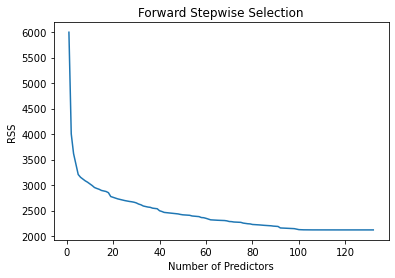

In [ ]:
plt.plot(models_fwd.index, models_fwd.RSS)
plt.xlabel('Number of Predictors')
plt.ylabel('RSS')
plt.title('Forward Stepwise Selection')
plt.show()

The plot above is monotonically decreasing. It suggests that adding extra variables makes the model more accurate. While this is true, the extra features increases the likelihood that the model will overfitting the data.

To remedy this issue, I perform 5-fold cross validation to determine the optimal number of features to include.

In [ ]:
def processSubset_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_fold_train,X_fold_train[list(feature_set)])
    regr = model.fit()
    RSS_val = ((regr.predict(X_fold_val[list(feature_set)]) - y_fold_val) ** 2).sum()
    return {"model":regr, "RSS_val":RSS_val}

In [ ]:
def forward_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_fold_train.columns if p not in predictors]
    results = []

    for p in remaining_predictors:
        results.append(processSubset_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, predictors+[p]))

    # Put the results in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the lowest validation RSS
    best_model = models.loc[models['RSS_val'].argmin()]

    # Return the best model
    return best_model

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

RSS_df = pd.DataFrame()
model_df = pd.DataFrame()
fold = 0

for train_index, val_index in kf.split(X):
    # Separate each array into respective variables
    X_fold_train = np.array(X)[train_index]
    y_fold_train = y[train_index]
    X_fold_val = np.array(X)[val_index]
    y_fold_val = y[val_index]

    X_fold_train = pd.DataFrame(data=X_fold_train, index = train_index, columns=X.columns)
    X_fold_val = pd.DataFrame(data=X_fold_val, index = val_index, columns=X.columns)

    models_fwd_CV = pd.DataFrame(columns=["RSS_val", "model"])

    predictors = ['Intercept']

    for i in range(1,len(X.columns)):
        models_fwd_CV.loc[i] = forward_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, predictors)
        predictors = models_fwd_CV.loc[i]["model"].model.exog_names

    RSS_df[fold] = models_fwd_CV.RSS_val
    model_df[fold] = models_fwd_CV.model

    fold = fold +1

RSS_df['AverageValidationRSS']= RSS_df.mean(axis = 1)

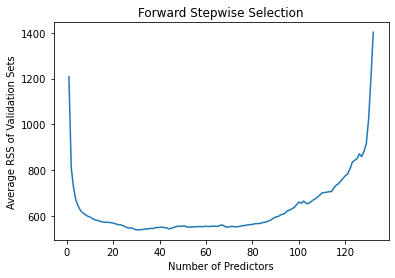

In [ ]:
plt.plot(models_fwd_CV.index, RSS_df.AverageValidationRSS)
plt.xlabel('Number of Predictors')
plt.ylabel('Average RSS of Validation Sets')
plt.title('Forward Stepwise Selection')
plt.show()

I use the one standard error rule to choose the number of predictors that should be used based on forward stepwise selection. This rule balances the variance to bias compromise of model selection

In [ ]:
m_rss = RSS_df.AverageValidationRSS
min_RSS_id = m_rss.idxmin()
lowest_ = m_rss[min_RSS_id]
SE_CV5 = m_rss.var()**0.5 / 5**0.5
index_ = []
value_ =[]

for i in range(1,30):
    if m_rss.iloc[i] > lowest_ and m_rss.iloc[i] < lowest_ + SE_CV5:
        index_.append(i)
        value_.append(m_rss.iloc[i])

index_corr = value_.index(min(value_))
num_predictors = index_[index_corr] - 1

print(num_predictors)

27




 I use the one standard error rule to choose the number of predictors that should be used based on backward stepwise selection i.e I start with a model with all the features, and each feature removed in a stepwise fashion that minimizes the RSS.

In [ ]:

from itertools import combinations

def backward_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, predictors):

    results = []

    if len(predictors) > 1:
        predictors_k = [i for i in combinations(predictors, len(predictors)-1)]
    else:
        predictors_k = predictors


    for sub_set in predictors_k:
        results.append(processSubset_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, list(sub_set)))

    # Put the results in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the lowest validation RSS
    best_model = models.loc[models['RSS_val'].argmin()]

    # Return the best model
    return best_model


kf = KFold(n_splits=5, shuffle=True, random_state=0)

RSS_df = pd.DataFrame()
model_df = pd.DataFrame()
fold = 0

for train_index, val_index in kf.split(X):
    # Separate each array into respective variables
    X_fold_train = np.array(X)[train_index]
    y_fold_train = y[train_index]
    X_fold_val = np.array(X)[val_index]
    y_fold_val = y[val_index]

    X_fold_train = pd.DataFrame(data=X_fold_train, index = train_index, columns=X.columns)
    X_fold_val = pd.DataFrame(data=X_fold_val, index = val_index, columns=X.columns)

    models_bwd_CV = pd.DataFrame(columns=["RSS_val", "model"])

    predictors = list(X.columns)
    predictors.remove('Intercept')
    predictors.insert(0,'Intercept')

    for i in range(1,len(X.columns)):
        models_bwd_CV.loc[i] = backward_CV(X_fold_train, y_fold_train, X_fold_val, y_fold_val, predictors)
        predictors = models_bwd_CV.loc[i]["model"].model.exog_names

    RSS_df[fold] = models_bwd_CV.RSS_val
    model_df[fold] = models_bwd_CV.model

    fold = fold +1

RSS_df['AverageValidationRSS']= RSS_df.mean(axis = 1)

# one standard error rule
m_rss = RSS_df.AverageValidationRSS
min_RSS_id = m_rss.idxmin()
lowest_ = m_rss[min_RSS_id]
SE_CV5 = m_rss.var()**0.5 / 5**0.5
index_ = []
value_ =[]

for i in range(1,30):
    if m_rss.iloc[i] > lowest_ and m_rss.iloc[i] < lowest_ + SE_CV5:
        index_.append(i)
        value_.append(m_rss.iloc[i])

index_corr = value_.index(min(value_))
num_predictors = index_[index_corr] - 1

print(num_predictors)


In [ ]:
plt.plot(models_bwd_CV.index, RSS_df.AverageValidationRSS)
plt.xlabel('Number of Predictors')
plt.ylabel('Average RSS of Validation Sets')
plt.title('Backward Stepwise Selection')
plt.show()


Next I attempt running ridge regression on the dataset. First I split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(295, 133) (295,) (74, 133) (74,)


Here I run ridge regression using an initial alpha value of 1

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))

print('The MSE is', ridge_mse)


The MSE is 14.238810425745164


 Next I use 5-fold cross-validation to determine the optimal value of alpha. I consider alpha values within np.linspace(0.0001, 5000, 1000). Then, using this optimal value of alpha, I fit a ridge regression and calculate the mean squared error of the test dataset.

In [ ]:
from sklearn.linear_model import RidgeCV

model_ridge = RidgeCV(alphas=np.linspace(0.0001,5000,1000), cv=5)
model_ridge.fit(X_train, y_train)
alp_ = model_ridge.alpha_

#use determined alpha to find optimal mse
optimal_ridge = RidgeCV(alphas=[alp_], cv=5)
model = optimal_ridge.fit(X_train, y_train)
y_pred = optimal_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_ridge)



1066.0661447447446
12.22537903124162


Here I plot the magnitude of the coefficients of the ridge regression.

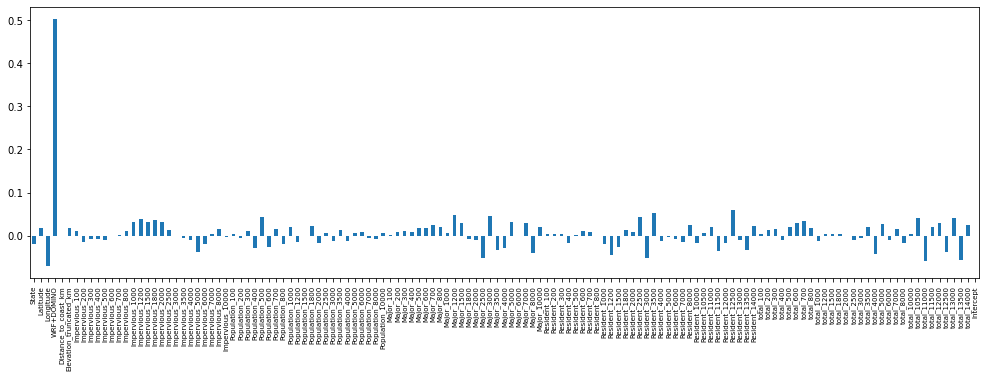

In [ ]:
ridge_coefs = pd.Series(optimal_ridge.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
ridge_coefs.plot(kind='bar');
plt.show()


From the data, I know that variables involved in the analysis so far cut across a wide variety of ranges. I would like to investigate the effects of standardizing the training data on the ridge regression model


In [ ]:

from sklearn.preprocessing import StandardScaler

# standardize dataset
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.fit_transform(X_test)


# use 5-fold cross-validation to determine optimal alpha
model_ridge = RidgeCV(alphas=np.linspace(0.0001,5000,1000), cv=5)
model_ridge.fit(X_train_std, y_train)
alp_ = model_ridge.alpha_

# use determined alpha to find optimal mse
optimal_ridge = RidgeCV(alphas=[alp_], cv=5)
model = optimal_ridge.fit(X_train_std, y_train)
y_pred = optimal_ridge.predict(X_test_std)
mse_ridge = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_ridge)


15.015114714714713
9.53572461747108


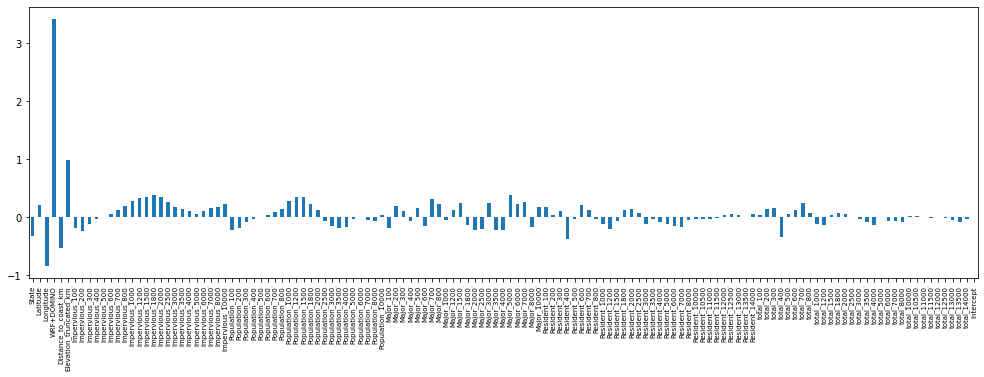

In [ ]:
# plot magnitude of the coefficients of the ridge regression model
ridge_coefs = pd.Series(optimal_ridge.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
ridge_coefs.plot(kind='bar');
plt.show()



The ridge regression doesn't completely erase some features. It can get really close to 0, and this can still cause problems with model complexity and high variance. I attemp Lasso regression to solve this problem. I create a lasso model with an `alpha` value of 1. Fit the training data onto the model, then return the mean squared error (MSE) of the test data and a list of coefficients for each feature.

The MSE is: 10.792634748374264


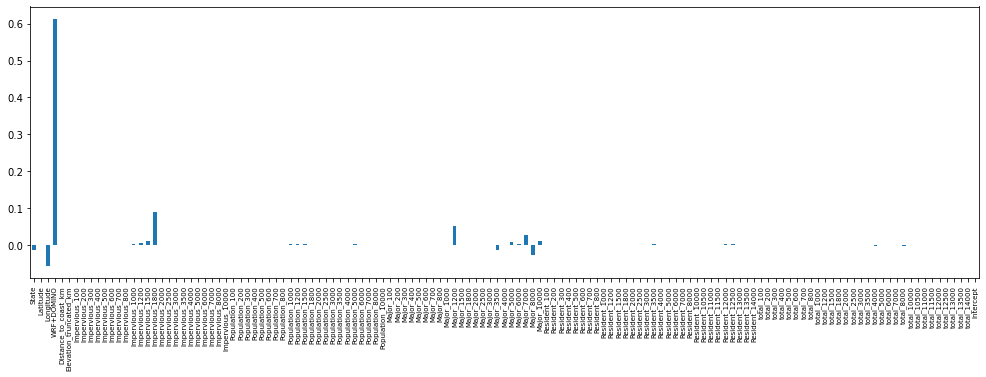

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_

lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
print('The MSE is:', lasso_mse)

lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
lasso_coefs.plot(kind='bar');
plt.show()

I used an arbitrary choice of alpha, 1. Now I use 5-fold cross-validation to determine the optimal value of alpha to use in lasso. Next, using this optimal value of alpha, I fit a lasso regression and calculate the mean squared error of the test dataset.

In [ ]:
from sklearn.linear_model import LassoCV

model_Lasso = LassoCV(alphas=np.linspace(0.0001,5000,1000), cv=5)
model_Lasso.fit(X_train, y_train)
alp_ = model_Lasso.alpha_

# use determined alpha to find optimal mse
optimal_Lasso = LassoCV(alphas=[alp_], cv=5)
model = optimal_Lasso.fit(X_train, y_train)
y_pred = optimal_Lasso.predict(X_test)
mse_Lasso = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_Lasso)

5.005104904904904
13.66803114884088


I plot the resulting magnitude of the coefficients of the ridge regression.

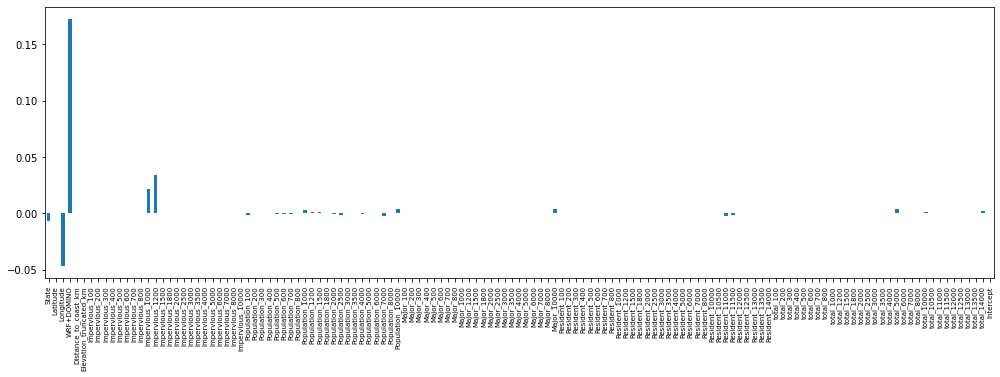

In [ ]:
lasso_coefs = pd.Series(optimal_Lasso.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
lasso_coefs.plot(kind='bar');
plt.show()

 Here I explore the effect of standardizing the feature matrix, X, on the results from lasso, and then calculate the optimal alpha based on 5-fold cross-validation and test set mean squared error. Also for both RidgeCV and LassoCV with standardization, I plot the magnitude of the coefficients.


In [ ]:
#scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.fit_transform(X_test)

model_Lasso = LassoCV(alphas=np.linspace(0.0001,5000,1000), cv=5)
model_Lasso.fit(X_train_std, y_train)
alp_ = model_Lasso.alpha_

#use determined alpha to find optimal mse
optimal_Lasso = LassoCV(alphas=[alp_], cv=5)
model = optimal_Lasso.fit(X_train_std, y_train)
y_pred = optimal_Lasso.predict(X_test_std)
mse_Lasso = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_Lasso)

0.0001
10.662651284435423


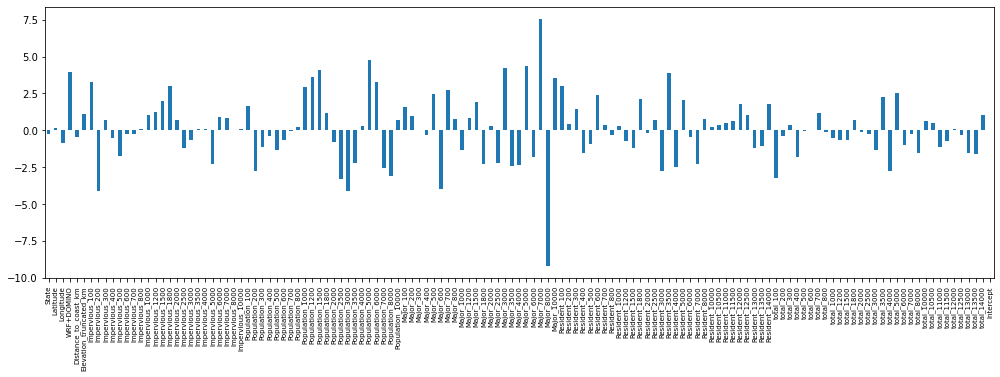

In [ ]:
lasso_coefs = pd.Series(optimal_Lasso.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
lasso_coefs.plot(kind='bar');
plt.show()

In [ ]:
# standardizing the training data produces more non-zero coefficients of predictors than the lasso trained no non-standardized data

 Both RidgeCV and LassoCV I normalize the feature matrix, and then calculate the optimal alpha based on 5-fold cross-validation and test set mean squared error. Also for both RidgeCV and LassoCV with normalization, I plot the magnitude of the coefficients.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

# Lasso
model_Lasso = LassoCV(alphas=np.linspace(0.0001,5000,1000), normalize=True, cv=5)
model_Lasso.fit(X_train, y_train)
alp_ = model_Lasso.alpha_

# use determined alpha to find optimal mse
optimal_Lasso = LassoCV(alphas=[alp_], cv=5)
model = optimal_Lasso.fit(X_train, y_train)
y_pred = optimal_Lasso.predict(X_test)
mse_Lasso = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_Lasso)



0.0001
9.913666414023195


In [ ]:
# ridge
model_ridge = RidgeCV(alphas=np.linspace(0.0001,5000,1000), normalize=True, cv=5)
model_ridge.fit(X_train, y_train)
alp_ = model_ridge.alpha_

# use determined alpha to find optimal mse
optimal_ridge = RidgeCV(alphas=[alp_], cv=5)
model = optimal_ridge.fit(X_train, y_train)
y_pred = optimal_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print(alp_)
print(mse_ridge)

0.0001
15.03540134582771


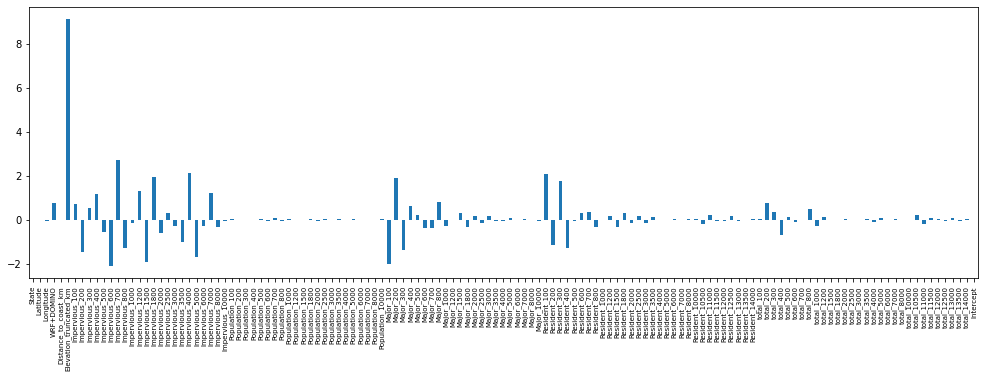

In [ ]:
# ridge
ridge_coefs = pd.Series(optimal_ridge.coef_, index=X.columns).
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
ridge_coefs.plot(kind='bar');
plt.show()
#print(ridge_coefs)

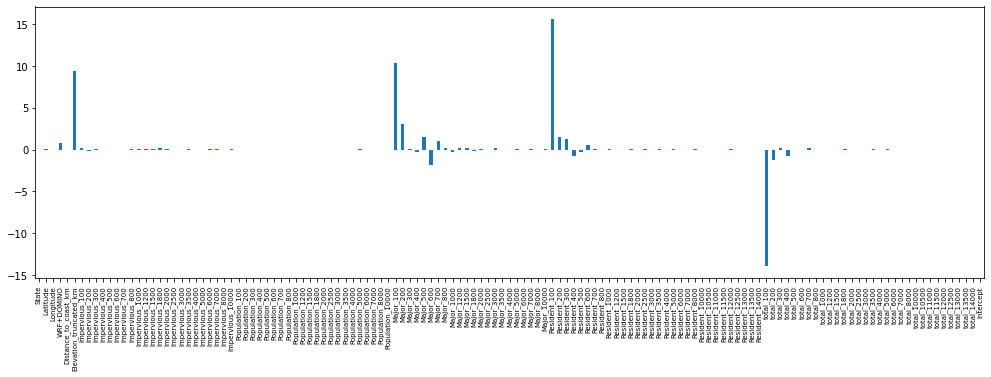

In [ ]:
# lasso

lasso_coefs = pd.Series(optimal_Lasso.coef_, index=X.columns)
plt.figure(figsize=(17, 5))
plt.tick_params(axis='x', labelsize=7)
lasso_coefs.plot(kind='bar');
plt.show()

In [ ]:
# in addition to having smaller mses, these normalized models have muche fewer non-zero coefficients of predictor variables